In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from time import time

In [2]:
def showim(img,den=1,colour=True):
    dpi = 80
    if(colour):
        height, width, depth = img.shape
    else:
        height, width = img.shape
        
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    #ax.axis('off')

    if(not colour): ax.imshow(img/den,cmap='gray',vmax=1,vmin=0)
    else: ax.imshow((img/den)[:,:,::-1],vmax=1,vmin=0)
    plt.show()
    
# img=cv2.imread('original.png')
# img_g=cv2.cvtColor(img.astype(np.float32)/255.,cv2.COLOR_BGR2GRAY)

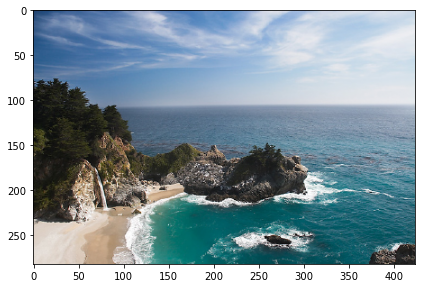

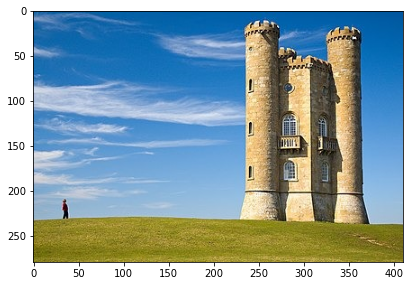

In [3]:
# Visualizing the test images
img=cv2.imread('original.png')

showim(img,255)
img=cv2.imread('img.png')

showim(img,255)
# cv2.imshow('3',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Energy Functions

In [4]:
# ENERGY FUNCTIONS
#Either one of grad, e1 or hog_e1 can be used as the energy function but e1 works best!

# def grad_x(img):
#     a=np.copy(img)

#     for r in range(img.shape[1]):
#         for c in range(1,img.shape[0]): 
#             a[c,r]-=img[c-1,r]
#     #return np.abs(a[:,:,0])+np.abs(+a[:,:,1])+np.abs(a[:,:,2])
#     return np.abs(a)
# def grad_y(img):
#     a=np.copy(img)
#     for r in range(1,img.shape[1]):
#         for c in range(img.shape[0]):
             
#             a[c,r]-=img[c,r-1]
            
#     return np.abs(a)      
# def grad(img):
#     return grad_x(img)+grad_y(img)


def e1(img):
    # Sum of Gradients
    dx = np.diff(img.astype(np.float32),axis=1)
    dy = np.diff(img.astype(np.float32),axis=0)
    dx = np.concatenate((dx,dx[:,-1].reshape(-1,1)),axis=1)
    dy = np.concatenate((dy,dy[-1,:].reshape(1,-1)),axis=0)
    e1 = np.absolute(dx) + np.absolute(dy)
    return e1
def hog_e1(img):
    # Histogram of Gradients
    img = img.astype(np.float32)
    gx = cv2.Sobel(img,cv2.CV_32F,1,0)
    gy = cv2.Sobel(img,cv2.CV_32F,0,1)
    fir, sec = cv2.cartToPolar(gx, gy)
    t=8
    bin = np.int32(t*sec/(2*np.pi))
    helperbin = []
    helper = []
    for i in range(0,int(img.shape[0]/11)):
        for j in range(0,int(img.shape[1]/11)):
            helperbin.append(bin[i*11:i*11+11,j*11:j*11+11])
            helper.append(fir[i*11:i*11+11,j*11:j*11+11])   
    hists = [np.bincount(b.ravel(),m.ravel(),8) for b,m in zip(helperbin, helper)]
    hist = np.hstack(hists)
    hist /= hist.sum() + (1e-7)
    hist = np.sqrt(hist)
    hist /= np.linalg.norm(hist) + (1e-7)
    hog_e1 = e1(img)/np.max(hist)
    return hog_e1.astype(np.float32)
def hog_colour(img):
        # Histogram of Gradients
    img = img.astype(np.float32)
    gx = cv2.Sobel(img,cv2.CV_32F,1,0)
    gy = cv2.Sobel(img,cv2.CV_32F,0,1)
    fir, sec = cv2.cartToPolar(gx, gy)
    t=8
    bin = np.int32(t*sec/(2*np.pi))
    helperbin = []
    helper = []
    for i in range(0,int(img.shape[0]/11)):
        for j in range(0,int(img.shape[1]/11)):
            helperbin.append(bin[i*11:i*11+11,j*11:j*11+11])
            helper.append(fir[i*11:i*11+11,j*11:j*11+11])   
    hists = [np.bincount(b.ravel(),m.ravel(),8) for b,m in zip(helperbin, helper)]
    hist = np.hstack(hists)
    hist /= hist.sum() + (1e-7)
    hist = np.sqrt(hist)
    hist /= np.linalg.norm(hist) + (1e-7)
    hog_e1 = e1_colour(img)/np.max(hist)
    return hog_e1.astype(np.float32)
#     img[:,:,0]=hog_e1(img[:,:,0])
#     img[:,:,1]=hog_e1(img[:,:,1])
#     img[:,:,2]=hog_e1(img[:,:,2])
#     return img
def e1_colour(img):
    return np.gradient(np.copy(img),axis=0)+np.gradient(np.copy(img),axis=1)+np.gradient(np.copy(img),axis=2)
# def grad_colour(img):
#     img[:,:,0]=grad(img[:,:,0])
#     img[:,:,1]=grad(img[:,:,1])
#     img[:,:,2]=grad(img[:,:,2])
#     return img

HOG


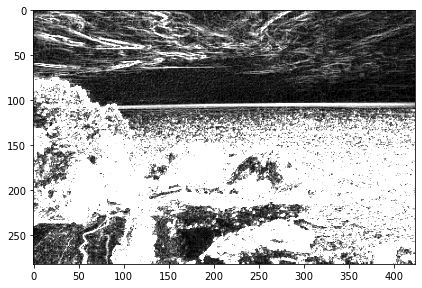

E1


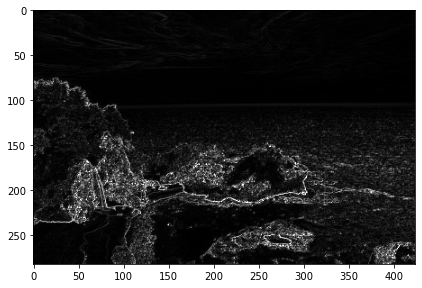

In [5]:
#ENERGY Function Visualisation on Grayscale
img=cv2.imread('original.png')
img_g=cv2.cvtColor(img.astype(np.float32)/255.,cv2.COLOR_BGR2GRAY)
print("HOG")
hog=hog_e1(img_g)
showim(hog,colour=0)
print("E1")
E1=e1(img_g)
showim(E1,colour=0)
# Grad=grad(img_g)
# showim(Grad,colour=0)
# cv2.imshow('3',hog)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


HOG


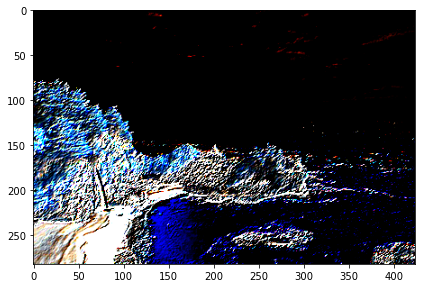

In [6]:
#ENERGY Function Visualisation on RGB
img=cv2.imread('original.png')
print("HOG")
hog=hog_colour(img)
showim(hog,255)

# Size Reduction/Enlargement

In [7]:
def min_vertical_pixels(img,g):    
    dp=np.zeros((img.shape[0],img.shape[1]))
    dp[0,:]=g[0,:]
    for r in range(1,dp.shape[0]):

        for c in range(dp.shape[1]):
            m=float('inf')

            m=min(g[r,c]+dp[r-1,c],m)

            if(c-1>=0):
                m=min(g[r,c]+dp[r-1,c-1],m)

            if(c+1<dp.shape[1]):
                m=min(g[r,c]+dp[r-1,c+1],m)
            dp[r,c]=m    

    pixels=[]
    index=np.argmin(dp[-1,:])
    ihat=np.copy(index)
    pixels.append(index)
    # Backtracking
    for i in reversed(range(img.shape[0]-1)):
        m=dp[i,index]
        temp=index

        if(index-1>=0 and dp[i,index-1]<m):
            temp=index-1
            m=dp[i,index-1]

        if(index+1<img.shape[1] and dp[i,index+1]<m):
            temp=index+1
            m=dp[i,index+1]
        index=temp
        pixels.append(index)

    pixels=list(reversed(pixels))
    return pixels,dp[-1,index]

def vertical_seam_rem(img,energy,obj_rem=False):
 
    img_g=cv2.cvtColor(img.astype(np.float32)/255.,cv2.COLOR_BGR2GRAY)
    
    #showim('original',img,255.)
    
    g=energy(img_g)
    #showim('energy',g,1.)
    if obj_rem==True:
        for r in range(img.shape[0]):
            for c in range(img.shape[1]):
                if np.array_equal(img[r,c],np.array([0,0,255])):
                    # we assign 0,0,255 to pixels we want to remove, therefore making their energy negative
                    g[r,c]=-1000
    
    
    pixels,_=min_vertical_pixels(img_g,g)
    image_hat=np.zeros((img.shape[0],img.shape[1]-1,img.shape[2]))
    image=np.copy(img)
    
   
    for r in range(img.shape[0]):
        
        # Removing pixels[r] and shifting remaining
        if(pixels[r]!=0):
            image_hat[r,:pixels[r]]=img[r,:pixels[r]]
            
        if(pixels[r]<image_hat.shape[1]):
            
            image_hat[r,pixels[r]:]=img[r,pixels[r]+1:]
    
        '''
        c_hat=0
        for c in range(img.shape[1]):
            
            if(c==pixels[r]):

                continue
            #if(r==1):
             #   print(c_hat,c)
            image_hat[r,c_hat]=img[r,c]   
            c_hat+=1
         '''
    #showim('final',image_hat,255.)
    return image_hat,pixels
    

In [8]:

def reduce_cols(img,num_cols,energy,obj_rem=False,opt=False,show_seam=False):

    image_hat=np.copy(img)
    image=np.copy(img)
    for i in range(num_cols):
        if(not opt):
            image_hat,pixels=vertical_seam_rem(image_hat,energy,obj_rem)
        else:
            image_hat,pixels,_=vertical_seam_rem(image_hat,energy,obj_rem,opt)
            
            
        for j in range(len(pixels)):
            image = cv2.circle(image, (pixels[j],j), radius=0, color=(0, 0, 255), thickness=-1)
    if(show_seam):
        print("Seams")
        showim(image,255.)  
    
    if(not opt):
        #showim(image,255.)  
        return image_hat
    if(opt):
        return image_hat ,_
  
 


In [9]:
def remove_vertical_k_min_seams(img,energy,k):
    # This function is helpful in the first step of insertion
    img_g=cv2.cvtColor(img.astype(np.float32)/255.,cv2.COLOR_BGR2GRAY)
    #showim('original',img,255.)
    g=energy(img_g)
    seams=[]
  
    cmask=np.zeros((k,img.shape[0])).astype(np.int)
    image=np.copy(img)
    mask=np.zeros((img.shape[0],img.shape[1])).astype(np.int)
    for i in range(1,k+1):
        
        
        pixels,_=min_vertical_pixels(image,g)
        seams.append(pixels)
        image_hat=np.zeros((img.shape[0],img.shape[1]-i,img.shape[2]))
        g_hat=np.zeros((g.shape[0],g.shape[1]-1))
           
        for r in range(image.shape[0]):
            cmask[i-1,r]=mask[r,pixels[r]]
            mask[r,pixels[r]+mask[r,pixels[r]]+1:]+=1
           # to know by how much have the original pixels shifted due to removal
            if(pixels[r]!=0):
                image_hat[r,:pixels[r]]=image[r,:pixels[r]]
                g_hat[r,:pixels[r]]=g[r,:pixels[r]]

            if(pixels[r]<image_hat.shape[1]):

                image_hat[r,pixels[r]:]=image[r,pixels[r]+1:]
                g_hat[r,pixels[r]:]=g[r,pixels[r]+1:]
        image=np.copy(image_hat)
        g=np.copy(g_hat)

    return image,seams,cmask


'''
########### INCORRECT FUNCTION, GIVES BLURRING DUE TO REASONS MENTIONED IN THE PAPER##################        
def wrong_insert_cols(img,num_cols,energy,obj_rem=False):

    image_hat=np.copy(img)
    image=np.copy(img)
    for i in range(num_cols):
        image_hat,pixels=vertical_seam_insertion(image_hat,energy,obj_rem)

        for j in range(len(pixels)):
            image = cv2.circle(image, (pixels[j],j), radius=0, color=(0, 0, 255), thickness=-1)
    showim('seams',image,255.)   
    return image_hat
'''    
def insert_cols(img,num_cols,energy,show_seam=False):

    image,seams,cmask=remove_vertical_k_min_seams(img,energy,num_cols)
    seam_image=np.copy(img)
    seams=np.array(seams)
    #print(seams.shape,mask.shape,cmask.shape,np.max(seams[0]))
   
    
    image=np.zeros((img.shape[0],img.shape[1]+num_cols,img.shape[2]))
    for i in range(len(seams)):
        pixels=seams[i]
        
        for r in range(len(pixels)):
            
            
            seam_image=cv2.circle(seam_image, (int(pixels[r]+cmask[i,r]),r), radius=0, color=(0, 0, 255), thickness=-1)
                          
    #inv_seams=seams.reshape((-1,num_cols))
    for r in range(image.shape[0]):
        count=0
        prev=0
        pixels=[]
        for k in range(num_cols):
            pixel=int(seams[k,r]+cmask[k,r])
            pixels.append(pixel)
        pixels=sorted(pixels)
        #if(pixels[-1]>410):
         #   print(k,r,max(seams[:,r]))
        for k in range(num_cols):
            pixel=pixels[k]
            a=1
            b=2
            if(pixel==0):
                a=0
                b=2
            if(pixels==img.shape[1]-1):
                a=2
                b=1    
             #############CHOOSING AXIS IS VERY IMPORTANT!!!!!!!!!!!#############   
            
            insert=np.mean(img[r,pixel-a:pixel+b,:],axis=0)
            #insert=[]
            #insert.append(np.average(img[r,pixels[r]-a:pixels[r]+b,0]))
            #insert.append(np.average(img[r,pixels[r]-a:pixels[r]+b,1]))
            #insert.append(np.average(img[r,pixels[r]-a:pixels[r]+b,2]))
            #insert=np.array(insert)
            '''    
            image_hat[r,:pixels[r]+1]=img[r,:pixels[r]+1]
            image_hat[r,pixels[r]+1]=insert    
            image_hat[r,pixels[r]+2:]=img[r,pixels[r]+1:]
            '''
            if(pixels[k]!=0):
                try:
                    image[r,prev+count:pixel+count+1]=img[r,prev:pixel+1]
                except:
                    print(" ")
                    #print(k,r,count,prev,pixel,seams[1,261],cmask[0,261])
            try:       
                image[r,pixel+count+1]=insert 
            except:
                #print(28,k,r,count,prev,pixel,seams[0,r],cmask[1,r])
                return
            count+=1             
            prev=pixel+1  
            if(k==num_cols-1):
                if(pixel!=img.shape[1]-1):
                    image[r,prev+count:]=img[r,prev:]
                
             
        
    if(show_seam):
        print("Seams")
        showim(np.array(seam_image),255.)
    
    return image



In [10]:
def min_horizontal_pixels(img,g):    
    dp=np.zeros((img.shape[0],img.shape[1]))
    dp[:,0]=g[:,0]
    for c in range(1,dp.shape[1]):

        for r in range(dp.shape[0]):
        
            m=g[r,c]+dp[r,c-1]

            if(r-1>=0):
                m=min(g[r,c]+dp[r-1,c-1],m)

            if(r+1<dp.shape[0]):
                m=min(g[r,c]+dp[r+1,c-1],m)
            dp[r,c]=m    

    pixels=[]
    index=np.argmin(dp[:,-1])
    pixels.append(index)
    for i in reversed(range(img.shape[1]-1)):
        m=dp[index,i]
        temp=index

        if(index-1>=0 and dp[index-1,i]<m):
            temp=index-1
            m=dp[index-1,i]

        if(index+1<img.shape[0] and dp[index+1,i]<m):
            temp=index+1
            m=dp[index+1,i]
        index=temp
        pixels.append(index)

    pixels=list(reversed(pixels))
    return pixels




def horizontal_seam_rem(img,energy,obj_rem=False):
 
    img_g=cv2.cvtColor(img.astype(np.float32)/255.,cv2.COLOR_BGR2GRAY)
    
    #showim('original',img,255.)
    
    g=energy(img_g)
    #showim('energy',g,1.)
    if obj_rem==True:
        
        for r in range(img.shape[0]):
            for c in range(img.shape[1]):
                if np.array_equal(img[r,c],np.array([0,0,255])):
                         
                    g[r,c]=-1000
    
    
    pixels=min_horizontal_pixels(img_g,g)
   
    image_hat=np.zeros((img.shape[0]-1,img.shape[1],img.shape[2]))
    image=np.copy(img)
    
   
    for c in range(img.shape[1]):
        
        if(pixels[c]!=0):
            image_hat[:pixels[c],c]=img[:pixels[c],c]
            
        if(pixels[c]<image_hat.shape[0]):
            image_hat[pixels[c]:,c]=img[pixels[c]+1:,c]
        
        '''
        r_hat=0 
        for r in range(img.shape[0]):

            if(r==pixels[c]):

                continue
            #if(r==1):
             #   print(c_hat,c)
            image_hat[r_hat,c]=img[r,c]   
            r_hat+=1
        '''
    #showim('final',image_hat,255.)
    
    return image_hat,pixels


def reduce_rows(img,num_rows,energy,obj_rem=False, show_seam=False):
    
    image_hat=np.copy(img)
    image=np.copy(img)
    for i in range(num_rows):
        image_hat,pixels=horizontal_seam_rem(image_hat,energy,obj_rem)
        for i in range(len(pixels)):
            image = cv2.circle(image, (i,pixels[i]), radius=0, color=(0, 0, 255), thickness=-1)
    if(show_seam):
        print("Seams")
        showim(np.array(image),255.)   
    return image_hat   


In [11]:
# No need to write individual function for rows: Simply rotate and insert columns and rotate again

def insert_rows(img,num_rows,energy,show_seam=False):
    return cv2.rotate(insert_cols(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE),num_rows,energy,show_seam=show_seam), cv2.ROTATE_90_COUNTERCLOCKWISE)



In [12]:
def size_reduction(image_string,num_rows,num_cols,energy,show_seam=False):
    img=cv2.imread(image_string)
    image_hat=np.copy(img)
    
    if(num_cols!=0):
        image_hat=reduce_cols(img,num_cols,energy,show_seam=show_seam)
    if(num_rows!=0):
        image_hat=reduce_rows(image_hat,num_rows,energy,show_seam=show_seam)
    return image_hat

def size_enlargement(image_string,num_rows,num_cols,energy,show_seam=False):
    img=cv2.imread(image_string)
    image_hat=np.copy(img)

    if(num_cols!=0):    
        image_hat=insert_cols(img,num_cols,energy,show_seam=show_seam)
    if(num_rows!=0):
        image_hat=insert_rows(image_hat,num_rows,energy,show_seam=show_seam)
    return image_hat

### Testing Size Reduction and Enlargement

Seams


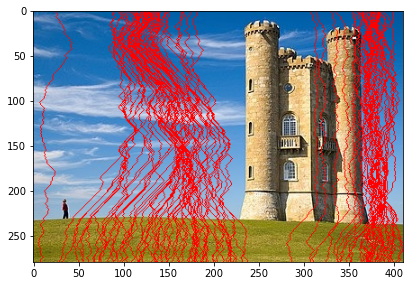

Seams


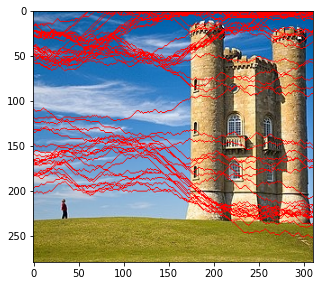

Original Image
Shape: (279, 411, 3)


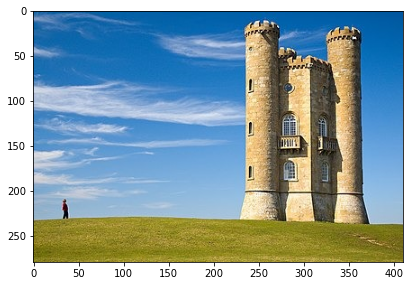

Image Reduced By 50 pixels in height and 100 pixels in width 
Shape: (229, 311, 3)


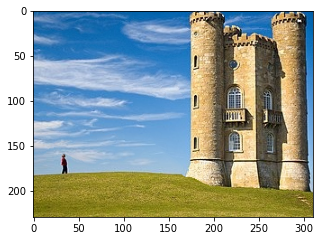

True

In [13]:
img1=cv2.imread('img.png')
img2=cv2.imread('original.png')
reduced=size_reduction('img.png',50,100,e1,show_seam=True)
print("Original Image")
print("Shape: "+str(img1.shape))
showim(img1,255.)
print("Image Reduced By 50 pixels in height and 100 pixels in width ")
print("Shape: "+str(reduced.shape))
showim(reduced,255.)
cv2.imwrite('reduced_new.png',reduced)

# enlarged=size_enlargement('reduced_demo.png',50,100,e1)
# showim(img1,255.)
# showim(enlarged,255.)
#cv2.imwrite('enlarged_demo.png',enlarged)

# showim(enlarged-img1,255.)
#cv2.imwrite('diffimg.png',enlarged-img1)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_22484\1209689480.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cmask=np.zeros((k,img.shape[0])).astype(np.int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22484\1209689480.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the r

Seams


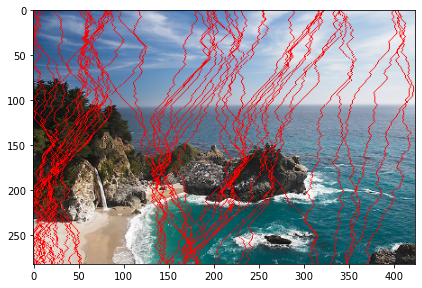

Seams


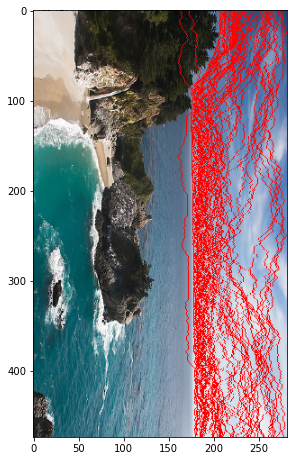

Original Image
Shape: (282, 424, 3)


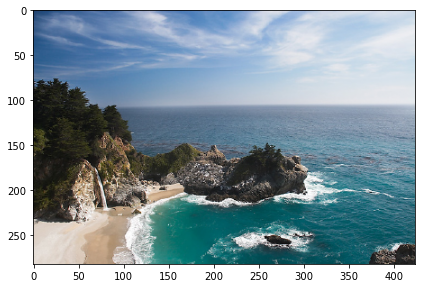

Image Enlarged By 50 pixels in height and 50 pixels in width 
Shape: (332, 474, 3)


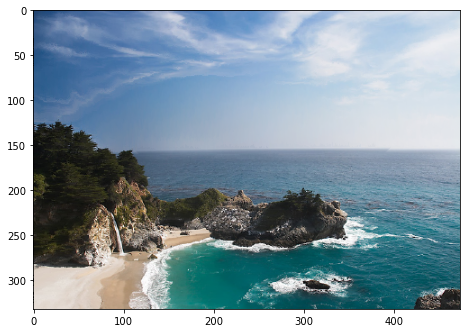

True

In [14]:
############SIZE ENLARGEMENT##########
enlarged=size_enlargement('original.png',50,50,e1,show_seam=True)
print("Original Image")
print("Shape: "+str(img2.shape))
showim(img2,255.)
print("Image Enlarged By 50 pixels in height and 50 pixels in width ")
print("Shape: "+str(enlarged.shape))
showim(enlarged,255.)
cv2.imwrite('enlarged_new.png',enlarged)


### Note: Previously we simply added/removed all the columns at once followed by the rows to modify the image size. Now we're following optimal ordering of row/column operation which takes minimum time (Dynamic Programming algorithm Described in Paper. We further compare the timings of both the functions

In [15]:

def optimal_size_enlargement(img_string,energy,num_rows,num_columns):
    '''
    Cost of 1 seam removal/insertion in image of size m*n is O(m*n)
    T[r,c] is the minimal cost of adding r rows and c cols
    '''
    img=cv2.imread(img_string)
    m,n=img.shape[0],img.shape[1]
    
    T=np.zeros((num_rows+1,num_columns+1))
    for i in range(1,num_rows+1):
        T[i,0]=T[i-1,0]+(m+i-1)*(n)
    for i in range(1,num_columns+1):
        T[0,i]=T[0,i-1]+(m)*(n+i-1)
    for r in range(1,num_rows+1):
        for c in range(1,num_columns+1):
            T[r,c]=min(T[r-1,c]+(m+r-1)*(n+c),T[r,c-1]+(m+r)*(n+c-1))
    #print(T)
    # Backtracking
    order=[]
    r,c=num_rows,num_columns
    while(True):
        if(r==0):
            while(c!=0):
                order.append('c')
                c-=1
            break    
        if(c==0):
            while(r!=0):
                order.append('r')
                r-=1
            break
        if(T[r,c]==T[r-1,c]+(m+r-1)*(n+c)):
            r-=1
            order.append('r')
        else:
            c-=1
            order.append('c')
    order=list(reversed(order))
    for x in order:
        if(x=='c'):
            img=insert_cols(img,1,energy)
        else:
            img=insert_rows(img,1,energy)
    return img        
def optimal_size_reduction(img_string,energy,num_rows,num_columns):
    '''
    Cost of 1 seam removal/insertion in image of size m*n is O(m*n)
    T[r,c] is the minimal cost of reducing r rows and c cols
    '''
    img=cv2.imread(img_string)
    m,n=img.shape[0],img.shape[1]
    
    T=np.zeros((num_rows+1,num_columns+1))
    for i in range(1,num_rows+1):
        T[i,0]=T[i-1,0]+(m-(i-1))*(n)
    for i in range(1,num_columns+1):
        T[0,i]=T[0,i-1]+(m)*(n-(i-1))
    for r in range(1,num_rows+1):
        for c in range(1,num_columns+1):
            T[r,c]=min(T[r-1,c]+(m-(r-1))*(n-c),T[r,c-1]+(m-r)*(n-(c-1)))
    #print(T)
    # Backtracking
    order=[]
    r,c=num_rows,num_columns
    while(True):
        if(r==0):
            while(c!=0):
                order.append('c')
                c-=1
            break    
        if(c==0):
            while(r!=0):
                order.append('r')
                r-=1
            break
        if(T[r,c]==T[r-1,c]+(m-(r-1))*(n-c)):
            r-=1
            order.append('r')
        else:
            c-=1
            order.append('c')
    order=list(reversed(order))
    for x in order:
        if(x=='c'):
            img=reduce_cols(img,1,energy)
        else:
            img=reduce_rows(img,1,energy)
    return img        


'''
Commented out code ensures optimal removal such that total energy lost is minimum and thus gives the best possible image,
however its very slow compared to the previous functions 
'''
# def optimal_size_reduction(img_string,energy,num_rows,num_columns):
#     img=cv2.imread(img_string)
#     T=np.array([[ [np.zeros((img.shape[0],img.shape[1])),2.] for a in range(num_columns+1)] for x in range(num_rows+1)])
    
    
#     T[0,0]=[img,0]

#     for r in range(1,num_rows+1):
        
#         a,b=reduce_cols(cv2.rotate(T[r-1,0,0], cv2.cv2.ROTATE_90_CLOCKWISE),1,energy,opt=True)
        
#         T[r,0,0]=cv2.rotate(a, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
#         T[r,0,1]=T[r-1,0,1]+b
        
#     for c in range(1,num_columns+1):
       
#         a,b=reduce_cols(T[0,c-1,0],1,energy,opt=True)
#         T[0,c]=a,T[0,c-1,1]+b
        
        
#     for r in range(1,num_rows+1):
     
#         for c in range(1,num_columns+1):
#             a1,b1=reduce_cols(cv2.rotate(T[r-1,c,0], cv2.cv2.ROTATE_90_CLOCKWISE),1,energy,opt=True)
#             a1=cv2.rotate(a1, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
#             b1=T[r-1,c,1]+b1
            
#             a2,b2=reduce_cols(T[r][c-1][0],1,energy,opt=True)
            
#             b2=T[r,c-1,1]+b2
           
#             if(np.float(b1)>np.float(b2)):
#                 T[r,c]=[a2,b2]
#             else:
#                 T[r,c]=[a1,b1]
#     image_hat=np.copy(T[num_rows,num_columns,0])
#     del(T)
#     return image_hat
  

# def optimal_size_enlargement(img_string,energy,num_rows,num_columns):
#     img=cv2.imread(img_string)
#     T=np.array([[ [np.zeros((img.shape[0],img.shape[1])),2.] for a in range(num_columns+1)] for x in range(num_rows+1)])

#     T[0,0]=[img,0]
    
#     for r in range(1,num_rows+1):
   
#         a,b=insert_cols(cv2.rotate(T[r-1,0,0], cv2.cv2.ROTATE_90_CLOCKWISE),1,energy,opt=True)
        
#         T[r,0,0]=cv2.rotate(a, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
#         T[r,0,1]=T[r-1,0,1]+b
        
#     for c in range(1,num_columns+1):
#         a,b=insert_cols(T[0,c-1,0],1,energy,opt=True)
#         T[0,c]=a,T[0,c-1,1]+b
        
        
#     for r in range(1,num_rows+1):
#         #print(r)
#         for c in range(1,num_columns+1):
#             a1,b1=insert_cols(cv2.rotate(T[r-1,c,0], cv2.cv2.ROTATE_90_CLOCKWISE),1,energy,opt=True)
#             a1=cv2.rotate(a1, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
#             b1=T[r-1,c,1]+b1
            
#             a2,b2=insert_cols(T[r][c-1][0],1,energy,opt=True)
            
#             b2=T[r,c-1,1]+b2
           
#             if(np.float(b1)>np.float(b2)):
#                 T[r,c]=[a2,b2]
#             else:
#                 T[r,c]=[a1,b1]
#     image_hat=np.copy(T[num_rows,num_columns,0])
#     del(T)
#     return image_hat
            

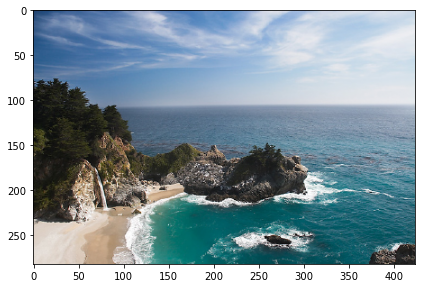

Image by Naive Reduction
Time taken(s): 66.88018655776978


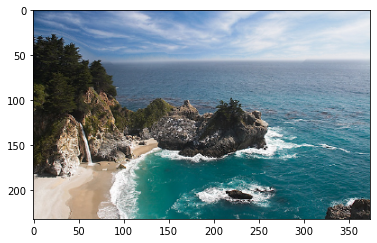

Image by Optimal Reduction
Time taken(s): 62.80098628997803


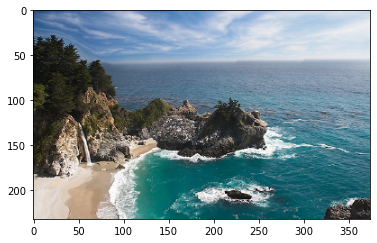

In [16]:
#####OPTIMAL SIZE CHANGE#########
# T=optimal_size_reduction('img.png',e1,2,4)
# showim('original',img1,255.)
# showim('reduced',T,255.)

t=time()
a=size_reduction('original.png',50,50,e1,show_seam=False)
t1=time()-t
t=time()
b=optimal_size_reduction('original.png',e1,50,50)
t2=time()- t
showim(img2,255.)
print("Image by Naive Reduction")
print("Time taken(s): " +str(t1))
showim(a,255.)
print("Image by Optimal Reduction")
print("Time taken(s): " +str(t2))
showim(b,255.)

# showim('original',img1,255.)
# showim('enlarged',T1,255.)



# Object Removal

In [17]:
class object_selector:
    def __init__(self,image,win_name='Select_Object'):
        self.coordi=[]
        self.img=image  
        self.name=win_name  
        
        
        
    def select_object(self,event, x, y, flags, params):
        
  

        if event == cv2.EVENT_LBUTTONDOWN:
  
            self.coordi.append([x,y])
            cv2.circle(self.img, (x, y), 2, (0, 0, 255), -1)
           
            
def object_removal(img_string):
    print('1. Select points in an order wise (clockwise or anticlockwise) fashion to create a polygon around the object you want to remove.')
    print('2. Use left mouse click to select the point.')
    print('3. Press "n" to select next point and view the previous point selected')
    print('4. Press any other key if you are done selecting points.')
    ##########OBJECT SELECTION#################
    img=cv2.imread(img_string)

    cv2.imshow('Select_Object',img)
    obj=object_selector(img)
    cv2.namedWindow('Select_Object')
    cv2.setMouseCallback('Select_Object', obj.select_object)  
    while(True):

        cv2.imshow("Select_Object", obj.img)
        k = cv2.waitKey(0) & 0xFF

        if k == ord("n"):

            continue

        else:
            cv2.destroyAllWindows()
            break

    masked_img = cv2.fillPoly(obj.img, np.array([obj.coordi]), color=(0, 0, 255))
    showim(masked_img,255.)
    ####################################################
    minx=min(obj.coordi,key=lambda x:x[0])[0]
    miny=min(obj.coordi,key=lambda x:x[1])[1]
    maxx=max(obj.coordi,key=lambda x:x[0])[0]
    maxy=max(obj.coordi,key=lambda x:x[1])[1]
    if(maxx-minx>maxy-miny):
        v=False
    else:
        v=True
    
    
    if(v==True):
        image_hat=reduce_cols(masked_img,maxx-minx+5,e1,True)
        showim(image_hat,255.)
        print("Object Removed without Image Reenlargement (smaller in size)")
        print("Shape: "+str(image_hat.shape))
        showim(image_hat,255.)
        cv2.imwrite('temp.png',image_hat)
        # Again insert seams to maintain original size
        image_hat=size_enlargement('temp.png',0,maxx-minx+5,e1)

    else:
        
        image_hat=reduce_rows(masked_img,maxy-miny+5,e1,True)
        print("Object Removed without Image Reenlargement (smaller in size)")
        print("Shape: "+str(image_hat.shape))
        showim(image_hat,255.)
        cv2.imwrite('temp.png',image_hat)
        # Again insert seams to maintain original size
        image_hat=size_enlargement('temp.png',maxy-miny+5,0,e1)

    #showim('final_image',image_hat,255.)
    return image_hat    



Original Image
Shape: (282, 424, 3)


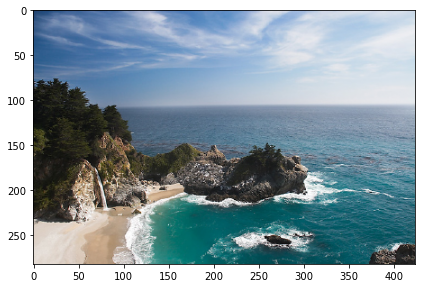

1. Select points in an order wise (clockwise or anticlockwise) fashion to create a polygon around the object you want to remove.
2. Use left mouse click to select the point.
3. Press "n" to select next point and view the previous point selected
4. Press any other key if you are done selecting points.


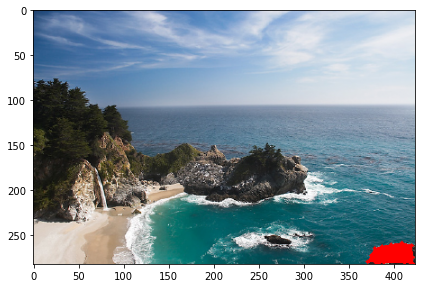

Object Removed without Image Reenlargement (smaller in size)
Shape: (254, 424, 3)


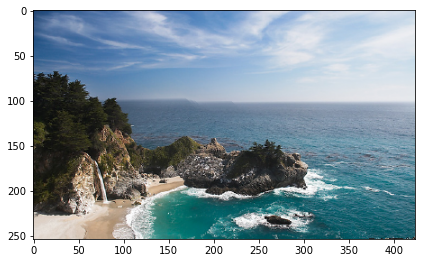

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22484\1209689480.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cmask=np.zeros((k,img.shape[0])).astype(np.int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22484\1209689480.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the r

Object Removed with Image Reenlargement (Same as original in size)
Shape: (282, 424, 3)


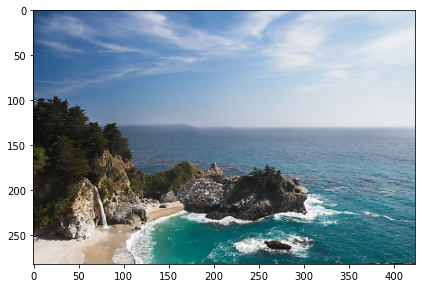

In [18]:
##########OBJECT REMOVAL############
img2=cv2.imread("original.png")
print("Original Image")
print("Shape: "+str(img2.shape))
showim(img2,255.)
image_hat=object_removal('original.png')


cv2.imwrite('object_removal_new.png',image_hat)
print("Object Removed with Image Reenlargement (Same as original in size)")
print("Shape: "+str(image_hat.shape))
showim(image_hat,255.)

